In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import matplotlib.patches as patches
from IPython.display import Audio
from scipy.io.wavfile import write
from datetime import datetime
import subprocess
# @Jannis:
#    conda install -c conda-forge pyaudio
#    pip install pya
from pya import *
from scipy.interpolate import LinearNDInterpolator

# interactive plots
# conda install ipympl
%matplotlib widget

In [ ]:
import simulation

sim_speed = 0.004
sim_fps = 400
duration = 6
frame_amount = duration * sim_fps

multi_slit = [(-15, -13), (-8, -6), (-1, 1), (6, 8), (13, 15)]
double_slit = [(-4, -2), (2, 4)]
single_slit = [(-2, 2)]
slits = double_slit

In [7]:
results = []

for n in range(32, 512 + 32, 32): #range(32, 512, 32):
    start = datetime.now()

    simulation.sim(n, sim_fps, duration, slits, sim_speed, normalize=True)
    
    end = datetime.now()
    taken_time = end - start
    print(f"Simulation with size{n} took {taken_time.total_seconds()} seconds")
    results.append({'x': n, 'y': taken_time.total_seconds()})

Simulation with size32 took 0.618531 seconds
Simulation with size64 took 1.328213 seconds
Simulation with size96 took 2.4191 seconds
Simulation with size128 took 3.844865 seconds
Simulation with size160 took 5.972146 seconds
Simulation with size192 took 8.607222 seconds
Simulation with size224 took 12.148416 seconds
Simulation with size256 took 15.878523 seconds
Simulation with size288 took 20.93846 seconds
Simulation with size320 took 26.277378 seconds
Simulation with size352 took 33.116127 seconds
Simulation with size384 took 38.561214 seconds
Simulation with size416 took 51.372235 seconds
Simulation with size448 took 53.741515 seconds
Simulation with size480 took 61.658614 seconds
Simulation with size512 took 74.381703 seconds


In [10]:
print(results)

[{'x': 32, 'y': 0.618531}, {'x': 64, 'y': 1.328213}, {'x': 96, 'y': 2.4191}, {'x': 128, 'y': 3.844865}, {'x': 160, 'y': 5.972146}, {'x': 192, 'y': 8.607222}, {'x': 224, 'y': 12.148416}, {'x': 256, 'y': 15.878523}, {'x': 288, 'y': 20.93846}, {'x': 320, 'y': 26.277378}, {'x': 352, 'y': 33.116127}, {'x': 384, 'y': 38.561214}, {'x': 416, 'y': 51.372235}, {'x': 448, 'y': 53.741515}, {'x': 480, 'y': 61.658614}, {'x': 512, 'y': 74.381703}]


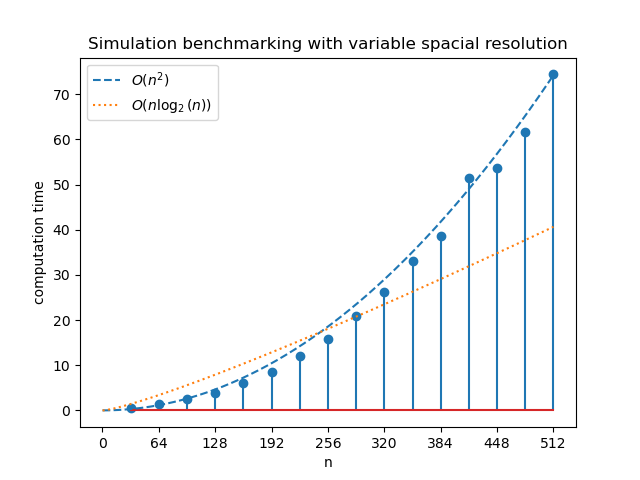

In [35]:
x = [r['x'] for r in results]
y = [r['y'] for r in results]

fig, ax = plt.subplots()
plt.stem(x, y)
plt.xticks(range(0, max(x) + 1, 64))

#for r in results:
#    ax.annotate(r['y'], (r['x'], r['y']))

# Define x values for the fit curves
x_fit = np.linspace(0.1, max(x), 400)  # smooth x values for plotting

# Calculate y values for x^2 and x log2 x fits
y_fit_x2 = np.average(np.divide(y, np.square(x))) * x_fit ** 2
y_fit_xlogx = np.average(np.divide(y, np.array(x) * np.log2(x))) * x_fit * np.log2(x_fit)

# Add fit curves to the plot
plt.plot(x_fit, y_fit_x2, label='$O(n^2)$', linestyle='--')  # Dashed line for x^2
plt.plot(x_fit, y_fit_xlogx, label='$O(n \log_2(n))$', linestyle=':')  # Dotted line for x log2 x

plt.legend()
plt.xlabel("n")
plt.ylabel("computation time")
plt.title("Simulation benchmarking with variable spacial resolution")
plt.show()
plt.close()